<a href="https://colab.research.google.com/github/thomas-ferraz/FakeNews-BERTimbau/blob/main/Modelo_BERTimbau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Requirements

In [1]:
!pip install transformers

     |████████████████████████████████| 1.5MB 7.9MB/s 
     |████████████████████████████████| 2.9MB 32.6MB/s 
     |████████████████████████████████| 890kB 53.2MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=0aa1c432c6f7b625a7015890f36721e03f0f1a84e7bfc5c75e50ffb1fe87c57b
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [1]:
import pandas as pd, numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
from sklearn.model_selection import StratifiedKFold
from transformers import *
import tokenizers
print('TF version',tf.__version__)

ModuleNotFoundError: ignored

In [3]:
import json
import tensorflow as tf
import csv
import random
import numpy as np
import sklearn

#from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras import regularizers

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [5]:
import pandas as pd
true=pd.read_csv('https://raw.githubusercontent.com/thomas-ferraz/FakeNews-BERTimbau/main/dataset/true.csv')
fake=pd.read_csv('https://raw.githubusercontent.com/thomas-ferraz/FakeNews-BERTimbau/main/dataset/fake.csv')

In [6]:
true.head()

,text
0,﻿O Podemos decidiu expulsar o deputado federa...
1,"Bolsonaro é um liberal completo, diz president..."
2,Ministro do STF libera Andrea Neves de prisão ...
3,"Apesar da abundância, cresce preocupação com p..."
4,"Por que Harvard e MIT levarão Dilma, Moro e Su..."


In [9]:
true.shape

(3600, 1)

In [10]:
fake.head()

,text
0,Kátia Abreu diz que vai colocar sua expulsão e...
1,"Dr. Ray peita Bolsonaro, chama-o de conservad..."
2,Reinaldo Azevedo desmascarado pela Polícia Fed...
3,Relatório assustador do BNDES mostra dinheiro ...
4,"Radialista americano fala sobre o PT: ""Eles ve..."


In [6]:
def clean_text(text):
  return text.replace('\n', ' ').replace('\t', ' ').replace('   ', ' ').replace('  ', ' ')

def calc_len(text):
  return len(text.split(' '))

In [8]:
true['class'] = 0
fake['class'] = 1
df=pd.concat([true,fake], ignore_index=True)

In [9]:
df['text'] = df['text'].apply(clean_text)
df.head()

,text,class
0,﻿O Podemos decidiu expulsar o deputado federal...,0
1,"Bolsonaro é um liberal completo, diz president...",0
2,Ministro do STF libera Andrea Neves de prisão ...,0
3,"Apesar da abundância, cresce preocupação com p...",0
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",0


In [10]:
df['len'] = df['text'].apply(calc_len)
df.head()

,text,class,len
0,﻿O Podemos decidiu expulsar o deputado federal...,0,147
1,"Bolsonaro é um liberal completo, diz president...",0,856
2,Ministro do STF libera Andrea Neves de prisão ...,0,472
3,"Apesar da abundância, cresce preocupação com p...",0,7517
4,"Por que Harvard e MIT levarão Dilma, Moro e Su...",0,812


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


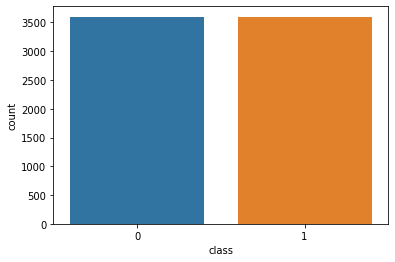

In [15]:
sns.countplot(df['class'])

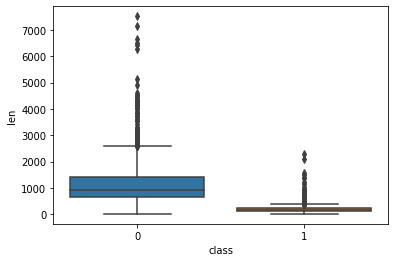

In [16]:
ax = sns.boxplot(x="class", y="len", data=df)

In [11]:
#Separar treino e test do treinamento

#aleatorizar e separar a 0
df_train=df.loc[df['class'] == 0].sample(frac=0.7,random_state=12) #random state is a seed value
df_val=df.loc[df['class'] == 0].drop(df_train.index)

#aleatorizar e separar a 1
df_train2=df.loc[df['class'] == 1].sample(frac=0.7,random_state=12) #random state is a seed value
df_val2=df.loc[df['class'] == 1].drop(df_train2.index)

#Juntar
df_train = pd.concat([df_train, df_train2])
df_val = pd.concat([df_val, df_val2])

#aleatorizar
from sklearn.utils import shuffle
df_train = shuffle(df_train, random_state=12)
df_val = shuffle(df_val, random_state=12)

In [12]:
X_val = df_val['text'].to_numpy()
X_train = df_train['text'].to_numpy()
Y_val = df_val['class'].to_numpy()
Y_train = df_train['class'].to_numpy()

# Model 1 - Linear SVM

In [14]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import re,string,unicodedata
import nltk

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
stop = set(nltk.corpus.stopwords.words('portuguese'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [90]:
pipe1 = Pipeline([('vect', CountVectorizer(stop_words=stop)),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model1 = pipe1.fit(X_train, Y_train)
Y_pred = model1.predict(X_val)

In [91]:
print(classification_report(Y_val, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1080
           1       0.96      0.98      0.97      1080

    accuracy                           0.97      2160
   macro avg       0.97      0.97      0.97      2160
weighted avg       0.97      0.97      0.97      2160



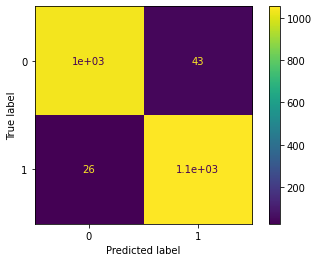

In [98]:
conf_matrix = metrics.confusion_matrix(Y_val, Y_pred)
metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1]).plot()

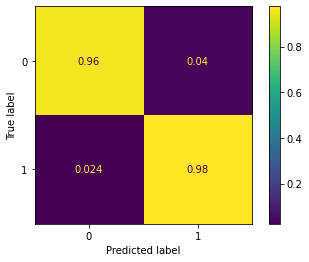

In [100]:
metrics.plot_confusion_matrix(model1,X_val,Y_val,labels=[0,1],normalize='true')
plt.show()

# Modelo 2 - Naive Bayes

In [104]:
from sklearn.naive_bayes import MultinomialNB
pipe2 = Pipeline([('vect', CountVectorizer(stop_words=stop)),
                  ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB()),])

model2 = pipe2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_val)

In [105]:
print(classification_report(Y_val, Y_pred2))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      1080
           1       0.99      0.22      0.37      1080

    accuracy                           0.61      2160
   macro avg       0.78      0.61      0.54      2160
weighted avg       0.78      0.61      0.54      2160



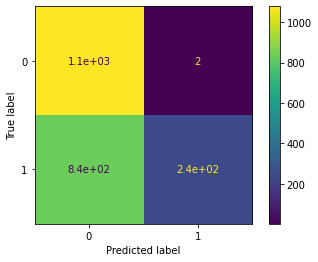

In [106]:
conf_matrix = metrics.confusion_matrix(Y_val, Y_pred2)
metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1]).plot()

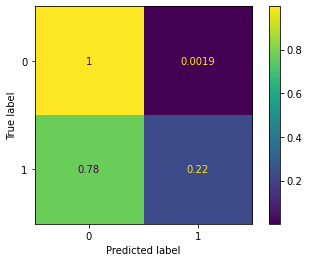

In [107]:
metrics.plot_confusion_matrix(model2,X_val,Y_val,labels=[0,1],normalize='true')
plt.show()

# Modelo 2A - Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
pipe2 = Pipeline([('vect', CountVectorizer(stop_words=stop)),
                  ('tfidf', TfidfTransformer()),
                  ('clf', DecisionTreeClassifier(random_state=12)),])

model2 = pipe2.fit(X_train, Y_train)
Y_pred2 = model2.predict(X_val)

In [18]:
print(classification_report(Y_val, Y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1080
           1       0.88      0.92      0.90      1080

    accuracy                           0.89      2160
   macro avg       0.90      0.89      0.89      2160
weighted avg       0.90      0.89      0.89      2160



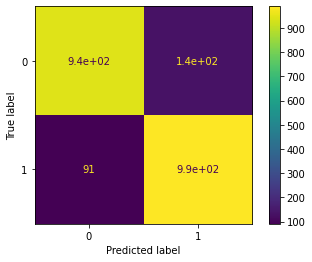

In [19]:
conf_matrix = metrics.confusion_matrix(Y_val, Y_pred2)
metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1]).plot()

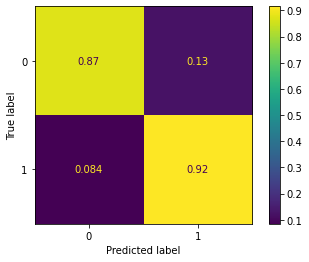

In [20]:
metrics.plot_confusion_matrix(model2,X_val,Y_val,labels=[0,1],normalize='true')
plt.show()

# Initialize BERTimbau

In [12]:
from transformers import AutoConfig, AutoTokenizer, TFAutoModel

Tokenizer = AutoTokenizer.from_pretrained('neuralmind/bert-large-portuguese-cased')

In [13]:
def tokenize(sentence, max_len=3000):
    tokens = Tokenizer.encode_plus(sentence, max_length=max_len,
                                   truncation=True, padding='max_length',
                                   add_special_tokens=True, return_attention_mask=True,
                                   return_token_type_ids=False, return_tensors='tf')
    return tokens['input_ids'], tokens['attention_mask']

def token_encode(X, max_len):
  input_ids = []
  masks = []
  for text in X:
    text_input_id, text_mask = tokenize(text, max_len=max_len)
    input_ids.append(tf.reshape(text_input_id, [max_len]))
    masks.append(tf.reshape(text_mask, [max_len]))
  return np.array(input_ids), np.array(masks)


In [14]:
def build_model(max_len=512, type_model='OnlyBERT'):
  input_ids = tf.keras.layers.Input(shape=(max_len,), name='input_ids', dtype=tf.int32)
  mask = tf.keras.layers.Input(shape=(max_len,), name='attention_mask', dtype=tf.int32)
  
  # By December 12th Hugging Face's Transformer Library only had the PyTorch version of BERTimbau so we needed to
  # convert the PyTorch model to TensorFlow using the AutoConfig class and adding from_pt (from pytorch) equal to True
  config = AutoConfig.from_pretrained('neuralmind/bert-large-portuguese-cased')
  BERTimbau = TFAutoModel.from_pretrained('neuralmind/bert-large-portuguese-cased', from_pt=True, config=config)

  last_bert_hidden_layer = BERTimbau(input_ids, attention_mask=mask)[0]

  if type_model == 'OnlyBERT':
    net = tf.keras.layers.Dense(64, activation='relu')(last_bert_hidden_layer)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Flatten()(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(1, activation='sigmoid')(net)

  elif type_model == 'BERT_LSTM':
    net = tf.keras.layers.Dense(64, activation='relu')(last_bert_hidden_layer)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Flatten()(net)
    out = tf.keras.layers.Dense(1, activation='sigmoid')(net)

  model = tf.keras.models.Model(inputs=[input_ids, mask], outputs=out)
  model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

  return model

# Model 3 

In [22]:
max_len = 100

X_train = token_encode(df_train['text'].to_numpy(), max_len)
X_val = token_encode(df_val['text'].to_numpy(), max_len)

In [31]:
X_train[0].shape

(5040, 500)

In [32]:
X_train[1].shape

(5040, 500)

In [33]:
print(X_train[0])

[[  101  7461   171 ...     0     0     0]
 [  101   231 18939 ...   368  6140   102]
 [  101  8878   348 ...  8878   348   102]
 ...
 [  101 11239   458 ...     0     0     0]
 [  101 13196 22324 ...     0     0     0]
 [  101 13057   118 ...  1600   125   102]]


In [34]:
print(X_train[1])

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


In [23]:
model3 = build_model(max_len=max_len)
model3.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_2 (TFBertModel)   TFBaseModelOutputWit 334396416   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 100, 64)      65600       tf_bert_model_2[0][0]      

In [24]:
train_history_3 = model3.fit(
    X_train, Y_train, 
    validation_data=(X_val, Y_val),
    epochs=10,
    batch_size=8,
    verbose=1
)

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Epoch 1/10


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


630/630 [==============================] - ETA: 0s - loss: 0.4215 - accuracy: 0.7554

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


630/630 [==============================] - 488s 746ms/step - loss: 0.4212 - accuracy: 0.7557 - val_loss: 0.0552 - val_accuracy: 0.9815
Epoch 2/10
630/630 [==============================] - 465s 738ms/step - loss: 0.0450 - accuracy: 0.9869 - val_loss: 0.0511 - val_accuracy: 0.9833
Epoch 3/10
630/630 [==============================] - 463s 736ms/step - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.1979 - val_accuracy: 0.9676
Epoch 4/10
630/630 [==============================] - 464s 737ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0591 - val_accuracy: 0.9833
Epoch 5/10
630/630 [==============================] - 463s 735ms/step - loss: 0.0069 - accuracy: 0.9983 - val_loss: 0.0470 - val_accuracy: 0.9861
Epoch 6/10
630/630 [==============================] - 464s 737ms/step - loss: 0.0069 - accuracy: 0.9972 - val_loss: 0.0981 - val_accuracy: 0.9801
Epoch 7/10
630/630 [==============================] - 463s 736ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0650 - val_accura

In [25]:
Y_test = model3.predict(X_val)

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


In [29]:
def y_ajust(y):
  y_hat = []
  for x in y:
    if x >= 0.5:
      y_hat.append(1)
    else:
      y_hat.append(0)
  return y_hat

In [40]:
from sklearn import metrics
Y_test = y_ajust(Y_test)
conf_matrix = metrics.confusion_matrix(Y_val, Y_test)
print(conf_matrix)
print(metrics.classification_report(Y_val, Y_test, digits=2))

[[1067   13]
 [   9 1071]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1080
           1       0.99      0.99      0.99      1080

    accuracy                           0.99      2160
   macro avg       0.99      0.99      0.99      2160
weighted avg       0.99      0.99      0.99      2160



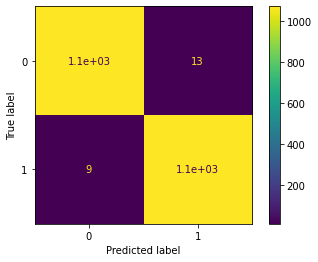

In [41]:
metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=[0,1]).plot()

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  print("history.history[string]")
  print(history.history[string])
  print("history.history['val_'+string]")
  print(history.history['val_'+string])

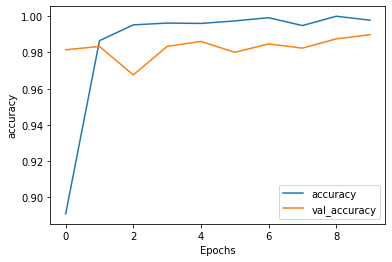

history.history[string]
[0.8908730149269104, 0.9865079522132874, 0.9952380657196045, 0.9962301850318909, 0.9960317611694336, 0.997420608997345, 0.9992063641548157, 0.9948412775993347, 1.0, 0.9978174567222595]
history.history['val_'+string]
[0.9814814925193787, 0.9833333492279053, 0.9675925970077515, 0.9833333492279053, 0.9861111044883728, 0.9800925850868225, 0.9847221970558167, 0.9824073910713196, 0.987500011920929, 0.989814817905426]


In [36]:
plot_graphs(train_history_3, "accuracy")

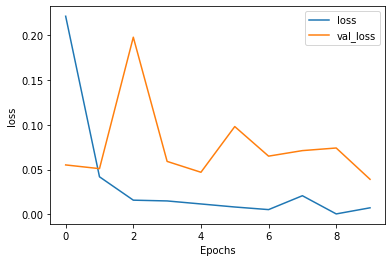

history.history[string]
[0.22132423520088196, 0.04194885119795799, 0.015838997438549995, 0.014973664656281471, 0.011598609387874603, 0.008204338140785694, 0.005286864470690489, 0.02080271951854229, 0.0004754793189931661, 0.00729760155081749]
history.history['val_'+string]
[0.05520413815975189, 0.051068708300590515, 0.1979033350944519, 0.05914086103439331, 0.04700846970081329, 0.09806680679321289, 0.06501846015453339, 0.07120331376791, 0.07412153482437134, 0.0391564778983593]


In [38]:
plot_graphs(train_history_3, "loss")

# Gráficos

In [39]:
Data = [0, 50, 504, 1260, 2520, 3780, 5040]
DecisionTree_acc = [0.7, 0.74, 0.86, 0.88, 0.88, 0.89, 0.89]
MultinomialNB_acc = [0.7, 0.60, 0.55, 0.56, 0.58, 0.60, 0.61]
LinearSVM_acc = [0.7, 0.80, 0.94, 0.96, 0.97, 0.97, 0.97]
BERTimbau_acc = [0.7, 0.7, 0.9690, 0.9810, 0.9870, 0.9898, 0.9898]

BERTimbau_acc_data01 = [0.43, 0.4399999976158142, 0.6600000262260437, 0.6800000071525574, 0.8799999952316284, 0.8999999761581421, 0.8799999952316284, 0.9200000166893005, 0.9599999785423279, 0.9399999976158142, 0.9399999976158142]
BERTimbau_val_acc_data01 = [0.54, 0.5412036776542664, 0.5546296238899231, 0.5703703761100769, 0.585185170173645, 0.5995370149612427, 0.6078703999519348, 0.6115740537643433, 0.614814817905426, 0.6171296238899231, 0.6226851940155029]
BERTimbau_loss_data01 = [0.89, 0.8851050734519958, 0.6188353896141052, 0.5191001296043396, 0.4350764751434326, 0.3628179132938385, 0.3419489562511444, 0.31037214398384094, 0.2994459867477417, 0.2625374495983124, 0.21762198209762573]
BERTimbau_val_loss_data01 = [0.71, 0.7012038230895996, 0.6877313852310181, 0.6789808869361877, 0.6717474460601807, 0.6656433939933777, 0.6605444550514221, 0.6557763814926147, 0.6516572833061218, 0.6461851596832275, 0.6408510208129883]

BERTimbau_acc_data10 = [0.43, 0.488095223903656, 0.7658730149269104, 0.932539701461792, 0.9563491940498352, 0.9920634627342224, 0.9900793433189392, 0.9940476417541504, 0.9980158805847168, 0.9940476417541504, 1.0]
BERTimbau_val_acc_data10 = [0.54, 0.6101852059364319, 0.7194444537162781, 0.8407407402992249, 0.9087963104248047, 0.9370370507240295, 0.949999988079071, 0.9393518567085266, 0.9689815044403076, 0.9435185194015503, 0.9587963223457336]
BERTimbau_loss_data10 = [0.89, 0.7652697563171387, 0.49237221479415894, 0.292572557926178, 0.15827766060829163, 0.04770412668585777, 0.02893701009452343, 0.019287649542093277, 0.009804250672459602, 0.018883654847741127, 0.008372065611183643]
BERTimbau_val_loss_data10 = [0.71, 0.6490412950515747, 0.5570694804191589, 0.4044719338417053, 0.22976598143577576, 0.16625875234603882, 0.1576279103755951, 0.20878316462039948, 0.1133430078625679, 0.21271999180316925, 0.14591379463672638]

BERTimbau_acc_data25 = [0.43, 0.6476190686225891, 0.9396825432777405, 0.988095223903656, 0.9912698268890381, 0.9928571581840515, 0.9992063641548157, 1.0, 0.9968253970146179, 0.9936507940292358, 0.9968253970146179]
BERTimbau_val_acc_data25 = [0.54, 0.852314829826355, 0.9486111402511597, 0.9782407283782959, 0.9615740776062012, 0.9652777910232544, 0.9740740656852722, 0.9800925850868225, 0.9699074029922485, 0.9800925850868225, 0.9810185432434082]
BERTimbau_loss_data25 = [0.89, 0.6351717710494995, 0.17442749440670013, 0.05842188745737076, 0.022013569250702858, 0.023522455245256424, 0.006860777735710144, 0.0012756538344547153, 0.014750098809599876, 0.016322530806064606, 0.01224109623581171]
BERTimbau_val_loss_data25 = [0.71, 0.40786299109458923, 0.18337266147136688, 0.08396180719137192, 0.1544930785894394, 0.13318322598934174, 0.10748650878667831, 0.11200269311666489, 0.1069072037935257, 0.07900846004486084, 0.06896888464689255]

BERTimbau_acc_data50 = [0.43, 0.7273809313774109, 0.980555534362793, 0.9916666746139526, 0.992460310459137, 0.9968253970146179, 0.9992063641548157, 0.9996031522750854, 0.9960317611694336, 0.9944444298744202, 1.0]
BERTimbau_val_acc_data50 = [0.54, 0.9481481313705444, 0.9768518805503845, 0.9777777791023254, 0.9837962985038757, 0.9791666865348816, 0.9851852059364319, 0.9865740537643433, 0.9680555462837219, 0.9861111044883728, 0.9870370626449585]
BERTimbau_loss_data50 = [0.89, 0.49671128392219543, 0.06372349709272385, 0.025941818952560425, 0.02175762504339218, 0.013828498311340809, 0.004720108117908239, 0.0013413741253316402, 0.012191345915198326, 0.019330011680722237, 0.0019276624079793692]
BERTimbau_val_loss_data50 = [0.71, 0.14898085594177246, 0.07207668572664261, 0.08165085315704346, 0.06298495829105377, 0.07598171383142471, 0.07458097487688065, 0.0787261351943016, 0.1351172924041748, 0.04589734971523285, 0.06398504227399826]

BERTimbau_acc_data75 = [0.43, 0.8558201193809509, 0.9865079522132874, 0.9894179701805115, 0.9984126687049866, 0.9965608716011047, 0.9965608716011047, 0.9984126687049866, 0.9968253970146179, 0.9997354745864868, 0.9997354745864868]
BERTimbau_val_acc_data75 = [0.54, 0.9791666865348816, 0.9731481671333313, 0.9731481671333313, 0.9879629611968994, 0.9888888597488403, 0.9851852059364319, 0.9694444537162781, 0.9856481552124023, 0.989814817905426, 0.9893518686294556]
BERTimbau_loss_data75 = [0.89, 0.2897211015224457, 0.04729680344462395, 0.030509669333696365, 0.007511806208640337, 0.01234954223036766, 0.008608275093138218, 0.006973716896027327, 0.011105944402515888, 0.0008298031170852482, 0.0006282267859205604]
BERTimbau_val_loss_data75 = [0.71, 0.0662703737616539, 0.1101440042257309, 0.10400038957595825, 0.04604407027363777, 0.053235579282045364, 0.05120529606938362, 0.13997609913349152, 0.05457942560315132, 0.055054765194654465, 0.06256777048110962]

BERTimbau_acc_data100 = [0.43, 0.8908730149269104, 0.9865079522132874, 0.9952380657196045, 0.9962301850318909, 0.9960317611694336, 0.997420608997345, 0.9992063641548157, 0.9948412775993347, 1.0, 0.9978174567222595]
BERTimbau_val_acc_data100 = [0.54, 0.9814814925193787, 0.9833333492279053, 0.9675925970077515, 0.9833333492279053, 0.9861111044883728, 0.9800925850868225, 0.9847221970558167, 0.9824073910713196, 0.987500011920929, 0.989814817905426]
BERTimbau_loss_data100 = [0.89, 0.22132423520088196, 0.04194885119795799, 0.015838997438549995, 0.014973664656281471, 0.011598609387874603, 0.008204338140785694, 0.005286864470690489, 0.02080271951854229, 0.0004754793189931661, 0.00729760155081749]
BERTimbau_val_loss_data100 = [0.71, 0.05520413815975189, 0.051068708300590515, 0.1979033350944519, 0.05914086103439331, 0.04700846970081329, 0.09806680679321289, 0.06501846015453339, 0.07120331376791, 0.07412153482437134, 0.0391564778983593]




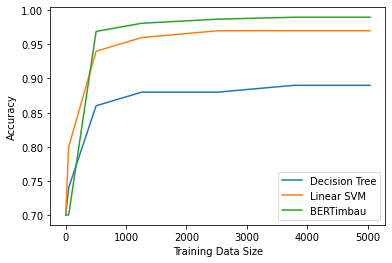

In [14]:
plt.plot(Data, DecisionTree_acc)
plt.plot(Data, LinearSVM_acc)
plt.plot(Data, BERTimbau_acc)
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy")
plt.legend(["Decision Tree", "Linear SVM", "BERTimbau"])

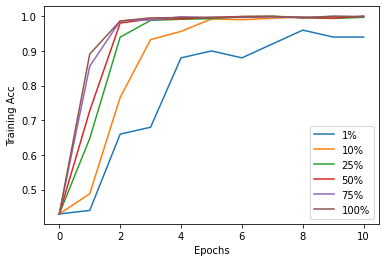

In [34]:
Epochs = [0,1,2,3,4,5,6,7,8,9,10]
plt.plot(Epochs, BERTimbau_acc_data01)
plt.plot(Epochs, BERTimbau_acc_data10)
plt.plot(Epochs, BERTimbau_acc_data25)
plt.plot(Epochs, BERTimbau_acc_data50)
plt.plot(Epochs, BERTimbau_acc_data75)
plt.plot(Epochs, BERTimbau_acc_data100)
plt.xlabel("Epochs")
plt.ylabel("Training Acc")
plt.legend(["1%", "10%", "25%", "50%", "75%", "100%"])

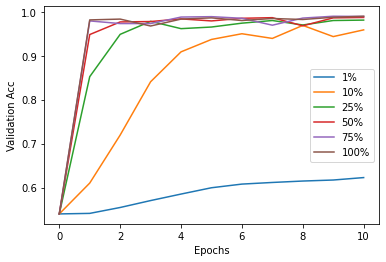

In [35]:
Epochs = [0,1,2,3,4,5,6,7,8,9,10]
plt.plot(Epochs, BERTimbau_val_acc_data01)
plt.plot(Epochs, BERTimbau_val_acc_data10)
plt.plot(Epochs, BERTimbau_val_acc_data25)
plt.plot(Epochs, BERTimbau_val_acc_data50)
plt.plot(Epochs, BERTimbau_val_acc_data75)
plt.plot(Epochs, BERTimbau_val_acc_data100)
plt.xlabel("Epochs")
plt.ylabel("Validation Acc")
plt.legend(["1%", "10%", "25%", "50%", "75%", "100%"])

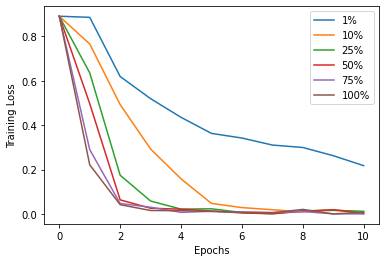

In [38]:
Epochs = [0,1,2,3,4,5,6,7,8,9,10]
plt.plot(Epochs, BERTimbau_loss_data01)
plt.plot(Epochs, BERTimbau_loss_data10)
plt.plot(Epochs, BERTimbau_loss_data25)
plt.plot(Epochs, BERTimbau_loss_data50)
plt.plot(Epochs, BERTimbau_loss_data75)
plt.plot(Epochs, BERTimbau_loss_data100)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.legend(["1%", "10%", "25%", "50%", "75%", "100%"])

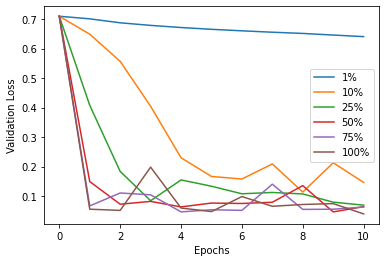

In [40]:
Epochs = [0,1,2,3,4,5,6,7,8,9,10]
plt.plot(Epochs, BERTimbau_val_loss_data01)
plt.plot(Epochs, BERTimbau_val_loss_data10)
plt.plot(Epochs, BERTimbau_val_loss_data25)
plt.plot(Epochs, BERTimbau_val_loss_data50)
plt.plot(Epochs, BERTimbau_val_loss_data75)
plt.plot(Epochs, BERTimbau_val_loss_data100)
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend(["1%", "10%", "25%", "50%", "75%", "100%"])